# Linear Regression with Python

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
sb.set(rc={'figure.figsize':(12,5)})

#for model selection and training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score

### Load the Data

In [2]:
# import dataset

all_stocks = pd.read_csv("/home/ratishankar/Downloads/ML_DATASET/NIFTY50_all.csv")

### EDA

In [3]:
all_stocks.shape

(232154, 15)

In [4]:
all_stocks.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [5]:
all_stocks.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
232149,2020-11-23,ZEEL,EQ,185.50,187.00,188.00,183.75,187.50,187.20,185.83,10409948,1.934494e+14,62523.0,2056205.0,0.1975
232150,2020-11-24,ZEEL,EQ,187.20,189.00,190.90,187.50,188.25,188.30,188.87,10723549,2.025318e+14,58930.0,1699719.0,0.1585
232151,2020-11-25,ZEEL,EQ,188.30,189.85,193.50,187.00,187.85,188.40,190.45,19366032,3.688257e+14,103144.0,4694198.0,0.2424
232152,2020-11-26,ZEEL,EQ,188.40,190.00,190.95,187.10,190.00,189.75,188.96,11611301,2.194075e+14,78442.0,2807780.0,0.2418
232153,2020-11-27,ZEEL,EQ,189.75,190.80,201.00,190.05,191.30,192.75,196.19,46930628,9.207522e+14,207884.0,15232023.0,0.3246


In [6]:
all_stocks.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,232154.000000,232154.000000,232154.000000,232154.000000,232154.000000,232154.000000,232154.000000,2.321540e+05,2.321540e+05,1.173060e+05,2.160770e+05,216077.000000
mean,1231.116150,1232.590656,1250.983991,1212.800750,1231.267231,1231.430421,1231.991710,2.839687e+06,1.483413e+14,5.870079e+04,1.263564e+06,0.507684
std,2504.511331,2508.214823,2541.564746,2470.684733,2504.417568,2505.165267,2505.712334,6.602118e+06,3.022263e+14,6.417293e+04,2.725301e+06,0.189683
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.210000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,272.050000,272.500000,277.200000,267.350000,272.050000,272.100000,272.360000,2.128405e+05,1.547079e+13,2.107100e+04,1.227090e+05,0.371200
50%,554.100000,555.000000,564.700000,545.000000,554.475000,554.200000,554.645000,9.884235e+05,6.522255e+13,4.233650e+04,4.927430e+05,0.516400
75%,1217.500000,1218.000000,1238.000000,1197.000000,1217.287500,1217.650000,1217.642500,2.893951e+06,1.749786e+14,7.531075e+04,1.406273e+06,0.642500
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


In [7]:
all_stocks.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

## Analyzing Shipping Industry


--- Mundra Ports (then)
--- Adani Ports (now)[https://www.thehindubusinessline.com/economy/logistics/mundra-port-co-is-now-adani-ports-and-sez-ltd/article23064427.ece]

In [8]:
adaniports = all_stocks.groupby(all_stocks['Symbol'] == 'ADANIPORTS')
mundraport = all_stocks.groupby(all_stocks['Symbol'] == 'MUNDRAPORT')



In [9]:
adaniports.describe()


Prev Close                                                           \
            count         mean          std    min    25%     50%      75%   
Symbol                                                                       
False    229957.0  1240.210563  2514.691800    0.0  273.5  561.75  1227.10   
True       2197.0   279.216249    97.432146  108.0  181.6  303.65   365.75   

                      Open               ... Deliverable Volume               \
             max     count         mean  ...                75%          max   
Symbol                                   ...                                   
False   32861.95  229957.0  1241.694611  ...         1396055.25  232530747.0   
True      448.75    2197.0   279.692103  ...         1945616.00   22416516.0   

       %Deliverble                                                              
             count      mean       std     min     25%     50%     75%     max  
Symbol                                                                          
False     213880.0  0.508269  0.189931  0.0236  0.3717  0.5173  0.6432  1.0000  
True        2197.0  0.450689  0.153343  0.0834  0.3424  0.4466  0.5516  0.9088  

[2 rows x 96 columns]

In [10]:
mundraport.describe()

Prev Close                                                              \
            count         mean          std    min      25%     50%       75%   
Symbol                                                                          
False    231131.0  1234.542140  2509.455151    0.0  272.400  554.90  1221.725   
True       1023.0   457.066813   265.269787  114.7  156.975  510.95   649.075   

                      Open               ... Deliverable Volume               \
             max     count         mean  ...                75%          max   
Symbol                                   ...                                   
False   32861.95  231131.0  1236.019494  ...         1412345.75  232530747.0   
True     1307.45    1023.0   457.897898  ...          435473.50   17269689.0   

       %Deliverble                                                        \
             count      mean       std     min      25%     50%      75%   
Symbol                                                                     
False     215054.0  0.507896  0.189798  0.0236  0.37130  0.5167  0.64280   
True        1023.0  0.463083  0.157458  0.0908  0.35505  0.4659  0.57015   

                
           max  
Symbol          
False   1.0000  
True    0.9798  

[2 rows x 96 columns]

In [11]:
adaniports.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3215,2020-11-23,ADANIPORTS,EQ,375.85,375.85,379.35,370.30,375.40,375.15,374.66,4065424,1.523157e+14,49565.0,1050441.0,0.2584
3216,2020-11-24,ADANIPORTS,EQ,375.15,378.00,402.00,376.00,391.90,392.25,395.17,19485370,7.700025e+14,200786.0,2329051.0,0.1195
3217,2020-11-25,ADANIPORTS,EQ,392.25,396.30,404.70,384.40,397.90,398.95,395.90,18238080,7.220519e+14,186507.0,3695655.0,0.2026
3218,2020-11-26,ADANIPORTS,EQ,398.95,400.80,413.00,395.65,410.45,410.15,404.31,12856261,5.197892e+14,141046.0,2513675.0,0.1955
3219,2020-11-27,ADANIPORTS,EQ,410.15,411.00,416.00,408.20,412.00,411.55,411.67,10593353,4.360993e+14,103550.0,4012544.0,0.3788
232149,2020-11-23,ZEEL,EQ,185.50,187.00,188.00,183.75,187.50,187.20,185.83,10409948,1.934494e+14,62523.0,2056205.0,0.1975
232150,2020-11-24,ZEEL,EQ,187.20,189.00,190.90,187.50,188.25,188.30,188.87,10723549,2.025318e+14,58930.0,1699719.0,0.1585
232151,2020-11-25,ZEEL,EQ,188.30,189.85,193.50,187.00,187.85,188.40,190.45,19366032,3.688257e+14,103144.0,4694198.0,0.2424
232152,2020-11-26,ZEEL,EQ,188.40,190.00,190.95,187.10,190.00,189.75,188.96,11611301,2.194075e+14,78442.0,2807780.0,0.2418
232153,2020-11-27,ZEEL,EQ,189.75,190.80,201.00,190.05,191.30,192.75,196.19,46930628,9.207522e+14,207884.0,15232023.0,0.3246


In [12]:
mundraport.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1018,2012-01-10,MUNDRAPORT,EQ,132.20,133.85,137.00,132.85,136.30,136.45,135.67,869679,1.179905e+13,13330.0,476412.0,0.5478
1019,2012-01-11,MUNDRAPORT,EQ,136.45,136.00,140.70,134.75,135.75,137.05,137.28,1810746,2.485799e+13,16447.0,799955.0,0.4418
1020,2012-01-12,MUNDRAPORT,EQ,137.05,137.50,137.50,131.20,131.60,132.65,133.23,1748799,2.329973e+13,10429.0,1029768.0,0.5888
1021,2012-01-13,MUNDRAPORT,EQ,132.65,132.50,133.00,129.55,131.80,131.55,131.93,1099713,1.450816e+13,12320.0,596301.0,0.5422
1022,2012-01-16,MUNDRAPORT,EQ,131.55,131.50,136.40,130.65,136.40,135.50,133.46,2060690,2.750111e+13,11808.0,1104897.0,0.5362
232149,2020-11-23,ZEEL,EQ,185.50,187.00,188.00,183.75,187.50,187.20,185.83,10409948,1.934494e+14,62523.0,2056205.0,0.1975
232150,2020-11-24,ZEEL,EQ,187.20,189.00,190.90,187.50,188.25,188.30,188.87,10723549,2.025318e+14,58930.0,1699719.0,0.1585
232151,2020-11-25,ZEEL,EQ,188.30,189.85,193.50,187.00,187.85,188.40,190.45,19366032,3.688257e+14,103144.0,4694198.0,0.2424
232152,2020-11-26,ZEEL,EQ,188.40,190.00,190.95,187.10,190.00,189.75,188.96,11611301,2.194075e+14,78442.0,2807780.0,0.2418
232153,2020-11-27,ZEEL,EQ,189.75,190.80,201.00,190.05,191.30,192.75,196.19,46930628,9.207522e+14,207884.0,15232023.0,0.3246


In [13]:
adaniports = pd.DataFrame(adaniports)

adaniports[1][1]

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1023,2012-01-17,ADANIPORTS,EQ,135.50,137.10,141.00,135.00,140.10,140.00,138.13,1636196,2.260074e+13,18374.0,1004327.0,0.6138
1024,2012-01-18,ADANIPORTS,EQ,140.00,142.00,143.80,138.70,143.00,141.70,141.25,890591,1.257986e+13,15615.0,404925.0,0.4547
1025,2012-01-19,ADANIPORTS,EQ,141.70,144.00,150.55,143.15,149.50,149.40,146.72,1456077,2.136382e+13,31299.0,721545.0,0.4955
1026,2012-01-20,ADANIPORTS,EQ,149.40,151.90,157.60,150.25,155.40,155.40,153.76,1634070,2.512583e+13,23335.0,861145.0,0.5270
1027,2012-01-23,ADANIPORTS,EQ,155.40,155.40,155.40,145.10,146.40,146.75,149.54,1657609,2.478768e+13,12400.0,820653.0,0.4951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,2020-11-23,ADANIPORTS,EQ,375.85,375.85,379.35,370.30,375.40,375.15,374.66,4065424,1.523157e+14,49565.0,1050441.0,0.2584
3216,2020-11-24,ADANIPORTS,EQ,375.15,378.00,402.00,376.00,391.90,392.25,395.17,19485370,7.700025e+14,200786.0,2329051.0,0.1195
3217,2020-11-25,ADANIPORTS,EQ,392.25,396.30,404.70,384.40,397.90,398.95,395.90,18238080,7.220519e+14,186507.0,3695655.0,0.2026
3218,2020-11-26,ADANIPORTS,EQ,398.95,400.80,413.00,395.65,410.45,410.15,404.31,12856261,5.197892e+14,141046.0,2513675.0,0.1955


In [14]:
mundraport = pd.DataFrame(mundraport)

mundraport[1][1]

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2012-01-10,MUNDRAPORT,EQ,132.20,133.85,137.00,132.85,136.30,136.45,135.67,869679,1.179905e+13,13330.0,476412.0,0.5478
1019,2012-01-11,MUNDRAPORT,EQ,136.45,136.00,140.70,134.75,135.75,137.05,137.28,1810746,2.485799e+13,16447.0,799955.0,0.4418
1020,2012-01-12,MUNDRAPORT,EQ,137.05,137.50,137.50,131.20,131.60,132.65,133.23,1748799,2.329973e+13,10429.0,1029768.0,0.5888
1021,2012-01-13,MUNDRAPORT,EQ,132.65,132.50,133.00,129.55,131.80,131.55,131.93,1099713,1.450816e+13,12320.0,596301.0,0.5422


In [15]:
start = datetime(year=2007, month=11, day=27)

end = datetime(year=2012, month=1, day=16)

<AxesSubplot:>

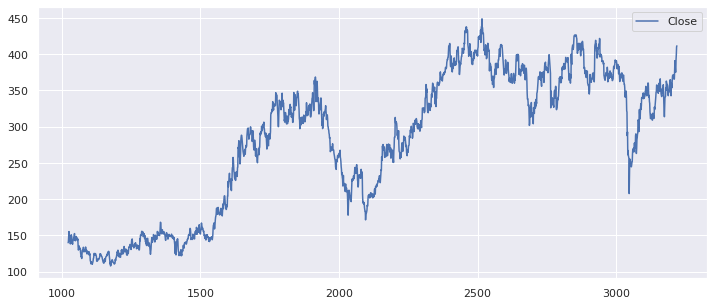

In [16]:
adaniports[1][1]['Close'].plot(legend=True,figsize=(12,5))

- Close Value over timeline: 2012 - 2020
- Signifies that the close value has shown rises and falls through the timeline.

<AxesSubplot:>

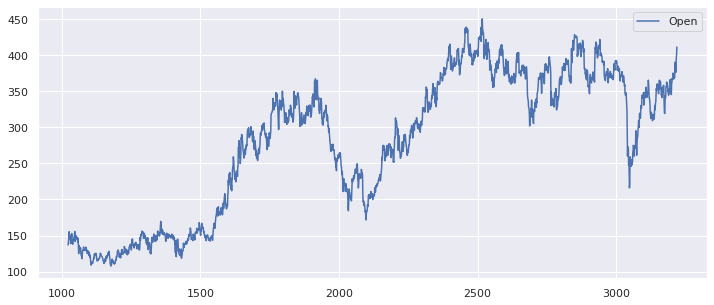

In [47]:
adaniports[1][1]['Open'].plot(legend=True,figsize=(12,5))

- Opening Value over timeline: 2012 - 2020
- Signifies that the open value has shown rises and falls through the timeline.

In [17]:
adaniports[1][1].isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [18]:
mundraport[1][1].isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [19]:
mundraport[1][1]["Trades"].fillna(0, inplace=True)

In [20]:
mundraport[1][1].isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

<AxesSubplot:xlabel='Volume', ylabel='Count'>

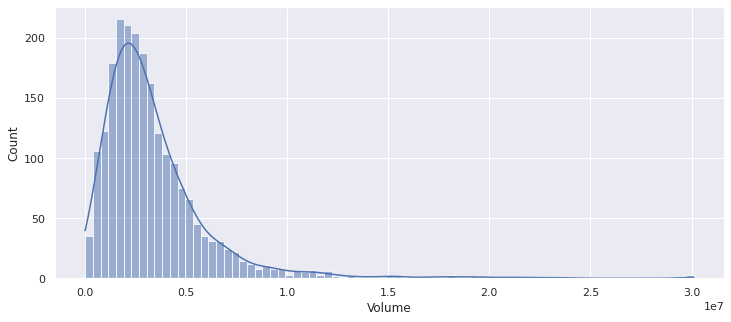

In [21]:
sb.histplot(adaniports[1][1]["Volume"], kde=True)

- Signifies that volume has seen constant changes,
- But the major Volume has ranged 0.3-0.35 * 1e7 units.

<AxesSubplot:xlabel='Open', ylabel='Turnover'>

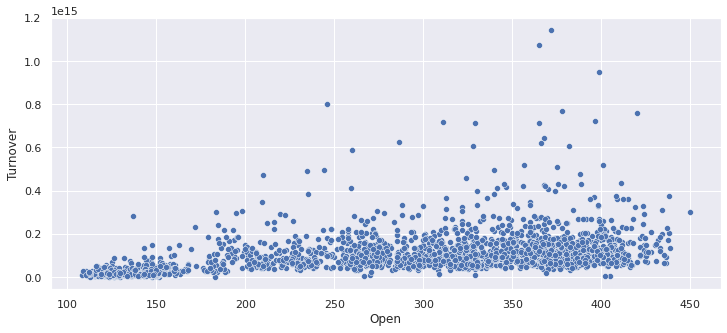

In [22]:
sb.scatterplot(x='Open',y='Turnover',data=adaniports[1][1])

- Signifies that Turnover has gradually increased with rise in Opening price.

<AxesSubplot:xlabel='Volume', ylabel='Count'>

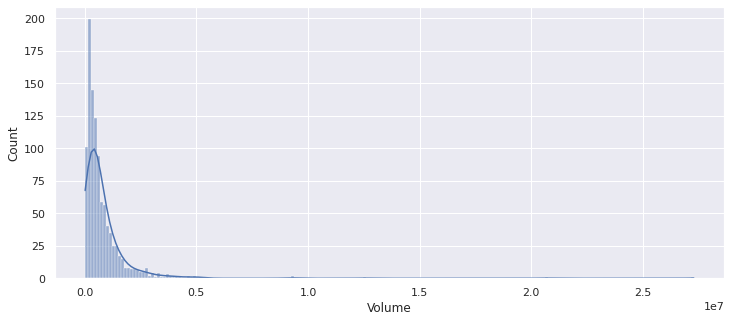

In [23]:
sb.histplot(mundraport[1][1]["Volume"], kde=True)

- Signifies that volume has seen constant changes,
- But the major Volume has ranged 0.1-0.15 * 1e7 units.

<AxesSubplot:xlabel='Open', ylabel='Turnover'>

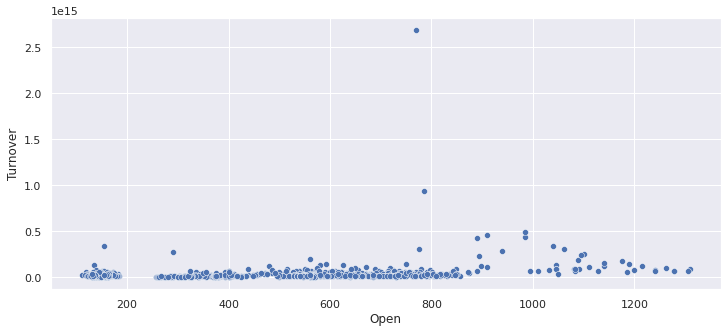

In [24]:
sb.scatterplot(x='Open',y='Turnover',data=mundraport[1][1])

- Signifies that Turnover has gradually increased with rise in Opening price.

<AxesSubplot:>

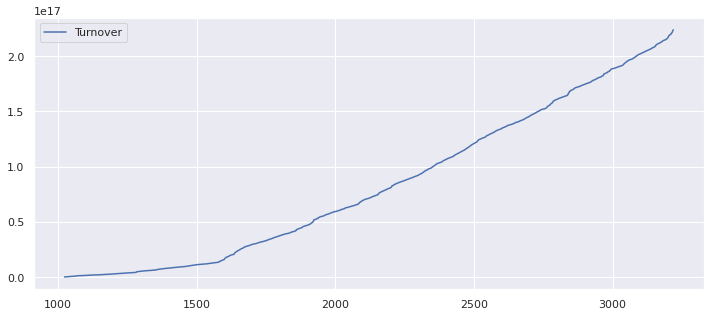

In [25]:
adani_cum = adaniports[1][1]["Turnover"].cumsum()

adani_cum.plot(legend=True, figsize=(12,5))

<AxesSubplot:>

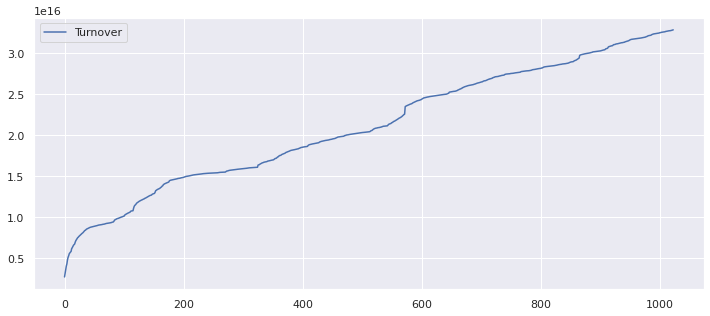

In [26]:
mundra_cum = mundraport[1][1].cumsum()

mundra_cum.plot(y="Turnover", legend=True, figsize=(12,5))

## 4. Training a Linear Regression Model

Let's now begin to train our regression model! We will need to first split up our data into an x array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### x and y arrays

In [27]:
x = adaniports[1][1][["Open", "Close", "High", "Low", "VWAP", "Volume"]]
y = adaniports[1][1]["Turnover"]

In [28]:
x

,Open,Close,High,Low,VWAP,Volume
1023,137.10,140.00,141.00,135.00,138.13,1636196
1024,142.00,141.70,143.80,138.70,141.25,890591
1025,144.00,149.40,150.55,143.15,146.72,1456077
1026,151.90,155.40,157.60,150.25,153.76,1634070
1027,155.40,146.75,155.40,145.10,149.54,1657609
...,...,...,...,...,...,...
3215,375.85,375.15,379.35,370.30,374.66,4065424
3216,378.00,392.25,402.00,376.00,395.17,19485370
3217,396.30,398.95,404.70,384.40,395.90,18238080
3218,400.80,410.15,413.00,395.65,404.31,12856261


In [29]:
y

1023    2.260074e+13
1024    1.257986e+13
1025    2.136382e+13
1026    2.512583e+13
1027    2.478768e+13
            ...     
3215    1.523157e+14
3216    7.700025e+14
3217    7.220519e+14
3218    5.197892e+14
3219    4.360993e+14
Name: Turnover, Length: 2197, dtype: float64

## Train Test Split

Now let's split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [31]:
x_train

,Open,Close,High,Low,VWAP,Volume
1185,115.10,112.95,116.90,112.15,113.61,1312589
2845,412.30,406.55,412.95,404.30,407.02,2511011
1566,184.05,181.60,186.90,180.75,183.90,1230749
1388,151.20,150.05,154.80,149.40,151.42,949423
1918,338.00,344.80,349.30,325.65,338.44,5152340
...,...,...,...,...,...,...
1622,239.00,236.95,242.10,233.10,238.17,2751243
2622,364.45,373.15,377.40,359.05,367.47,3241005
2384,373.85,381.25,383.70,373.85,381.41,4784990
2570,391.50,383.40,393.95,382.00,387.22,3770554


In [32]:
y_train

1185    1.491205e+13
2845    1.022036e+14
1566    2.263305e+13
1388    1.437581e+13
1918    1.743764e+14
            ...     
1622    6.552627e+13
2622    1.190983e+14
2384    1.825047e+14
2570    1.460050e+14
1886    8.039297e+13
Name: Turnover, Length: 1537, dtype: float64

In [33]:
x_train.shape

(1537, 6)

## Creating and Training the Model

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [36]:
# print the intercept and coeff
print(lm.intercept_)
print(lm.coef_)

-73517266974598.1
[-9.36571025e+10 -2.07788309e+11 -2.16961294e+11 -2.28665632e+11
  1.01456737e+12  2.92376507e+07]


In [37]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Open,-9.365710e+10
Close,-2.077883e+11
High,-2.169613e+11
Low,-2.286656e+11
VWAP,1.014567e+12
Volume,2.923765e+07


In [38]:
predictions=lm.predict(x_test)

In [39]:
adaniports_testing=pd.DataFrame(data=list(zip(y_test,predictions)),columns=['ACTUAL','PRED'])

<AxesSubplot:xlabel='Close', ylabel='Turnover'>

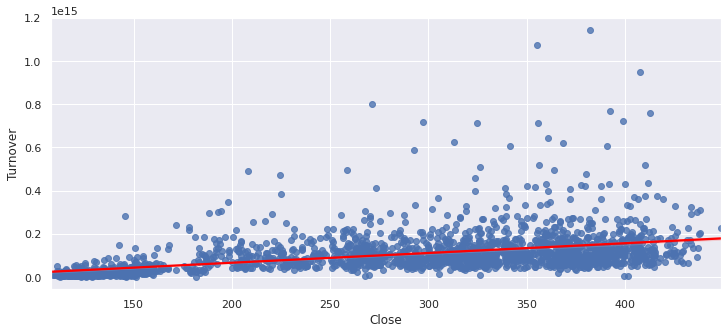

In [49]:
f, ax = plt.subplots(figsize=(12, 5))
sb.regplot(x="Close", y="Turnover", data=adaniports[1][1], ax=ax, line_kws={'color': 'red'})

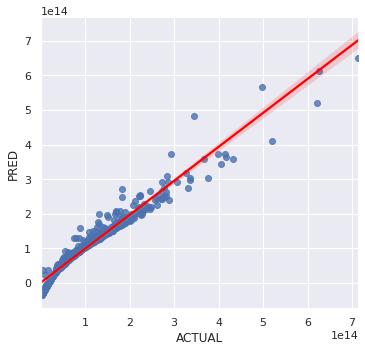

In [50]:
sb.lmplot(x='ACTUAL',y='PRED',data=adaniports_testing, line_kws={'color': 'red'})

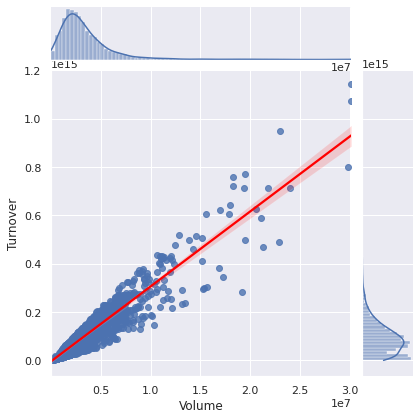

In [51]:
sb.jointplot(x="Volume", y="Turnover", data=adaniports[1][1], kind="reg", line_kws={'color': 'red'});

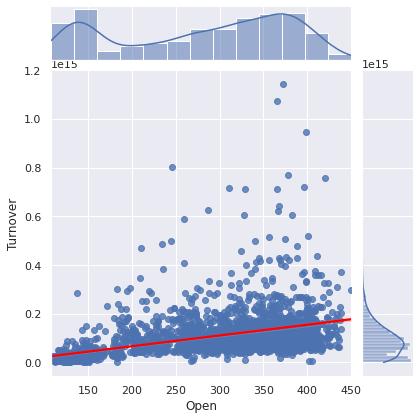

In [52]:
sb.jointplot(x="Open", y="Turnover", data=adaniports[1][1], kind="reg", line_kws={'color': 'red'});

#### From all above plots, we can observe the fact that


- The Turnover of Adani Ports sore high with increase in Open Price, Closing Price, Volume Traded, Daily Rise
- The model graphical analysis also demarcates the statement. 

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 13274060665197.287
MSE: 3.8763733863778845e+26
RMSE: 19688507780880.41


In [46]:
r2_score(y_test,predictions)

0.9486683833972032

### With accuracy of over 94% on test dataset